<a href="https://colab.research.google.com/github/Dukedennis55/personality-sim-psychiatry/blob/main/demo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mesa==1.1.0



In [2]:
!pip install mesa pandas matplotlib

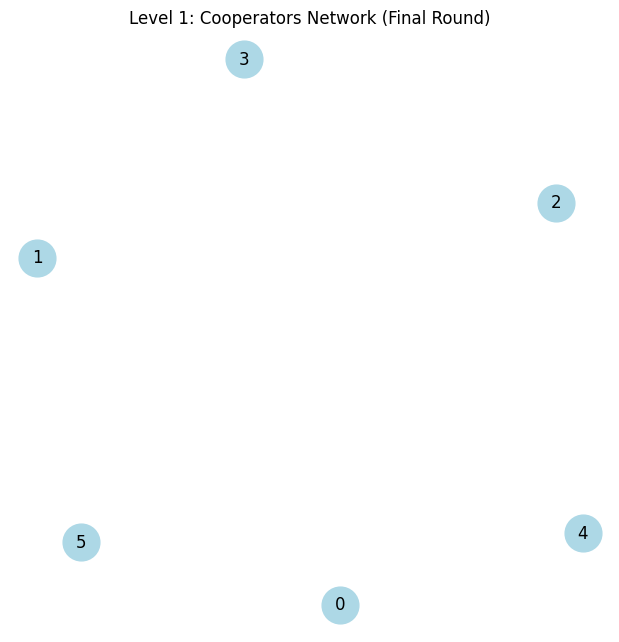

In [3]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import matplotlib.pyplot as plt
import networkx as nx
import random

class SimpleAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.social = random.random()
        self.last_action = None
        self.reward = 0

    def step(self):
        # Decide cooperate/defect based on social trait
        self.last_action = 'cooperate' if random.random() < self.social else 'defect'
        self.reward += 1 if self.last_action=='cooperate' else 0.5

class SimpleModel(Model):
    def __init__(self, N=6, rounds=10):
        self.schedule = RandomActivation(self)
        self.graph = nx.Graph()
        self.rounds = rounds
        self.round = 0
        self.running = True

        # Add agents
        for i in range(N):
            agent = SimpleAgent(i, self)
            self.schedule.add(agent)
            self.graph.add_node(agent.unique_id)

    def step(self):
        self.schedule.step()
        agents = self.schedule.agents
        self.graph.clear_edges()
        # Connect cooperators
        for i in range(len(agents)):
            for j in range(i+1, len(agents)):
                if agents[i].last_action=='cooperate' and agents[j].last_action=='cooperate':
                    self.graph.add_edge(agents[i].unique_id, agents[j].unique_id)
        self.round +=1
        if self.round>=self.rounds:
            self.running=False

# Run simulation
model = SimpleModel(N=6, rounds=15)
while model.running:
    model.step()

# Visualize final network
plt.figure(figsize=(6,6))
nx.draw(model.graph, with_labels=True, node_color='lightblue', node_size=700)
plt.title("Level 1: Cooperators Network (Final Round)")
plt.show()
